# Exploratory Data Analysis (EDA) for Uganda Budget Allocations (FY 2015/16 - 2021/22)
This notebook analyzes sector-level budget allocations to identify funding patterns, trends, and anomalies. Visualizations include:
    - Line chart: Sector allocations over time.
    - Pie chart: Budget share by sector for FY 2021/22.
    - Bar chart: Year-on-year percentage changes in allocations.
    - Box plot: Distribution of allocations to detect outliers.

# Exploratory Data Analysis (EDA) for Uganda Budget Allocations (FY 2015/16 - 2021/22)
This notebook analyzes sector-level budget allocations to identify funding patterns, trends, and anomalies. Visualizations include:
    - Line chart: Sector allocations over time.
    - Pie chart: Budget share by sector for FY 2021/22.
    - Bar chart: Year-on-year percentage changes in allocations.
    - Box plot: Distribution of allocations to detect outliers.
   

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

    
# Load cleaned dataset
df = pd.read_csv('/workspaces/uganda-budget-analysis/uganda_budget_cleaned.csv')


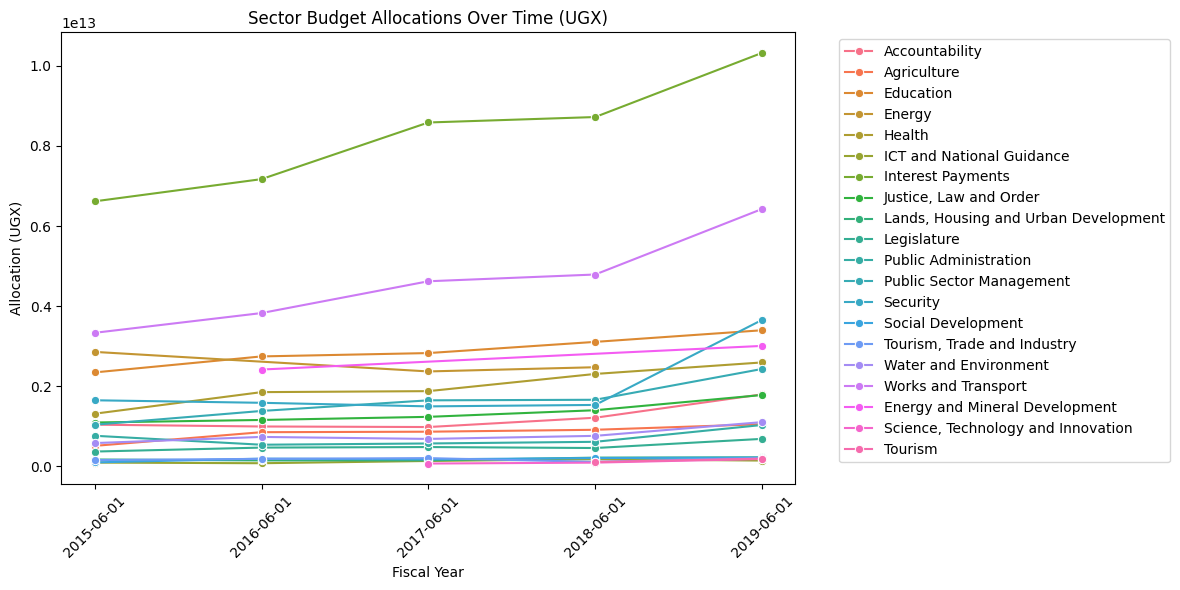

In [46]:
# Convert FinancialYear to string for plotting
df['FinancialYear'] = df['FinancialYear'].astype(str)

# Line chart: Allocations over time by sector
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='FinancialYear', y='Approved Budget', hue='Sector', marker='o')
plt.title('Sector Budget Allocations Over Time (UGX)')
plt.xlabel('Fiscal Year')
plt.ylabel('Allocation (UGX)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/workspaces/uganda-budget-analysis/sector_trends.png')
plt.show()

 

In [47]:
import nbformat
print(nbformat.__version__)

5.10.4


In [48]:
import IPython
print(IPython.__version__)

9.4.0


In [49]:
import sys
print(sys.executable)


/workspaces/uganda-budget-analysis/.venv/bin/python


In [50]:
import pandas as pd
import plotly.express as px

df = pd.read_excel('/workspaces/uganda-budget-analysis/budget_datasets/budget_fy_21_22.xlsx')

print(df['Year'].unique())  # gives ['2021-2022']

df_2122 = df[df['Year'] == '2021-2022']
if not df_2122.empty:
    fig = px.pie(
        df_2122,
        values='Amount',
        names='SectorName',
        title='FY 2021/22 Budget by Sector',
        labels={'Amount': 'Allocation (UGX)'},
        hover_data=['Amount']
    )
    fig.update_traces(textinfo='percent+label', pull=[0.1] + [0]*(len(df_2122)-1))
    fig.write_html('/workspaces/uganda-budget-analysis/sector_pie.html')
    fig.show()
else:
    print("No data for FY 2021/22 in the DataFrame")




['2021-2022']


In [51]:
print(df.columns.tolist())

['Year', 'SourceOfFunding', 'Category', 'SectorCode', 'SectorName', 'VoteCode', 'VoteName', 'ProgramCode', 'ProgrammeName', 'SubProgramCode', 'SubProgramName', 'KeyOutputCode', 'KeyOutputDescription', 'ItemCode', 'Description', 'ClassificationCode', 'ClassificationName', 'OutputClassCode', 'OutputClassName', 'Amount', 'Quarter', 'Expr1']


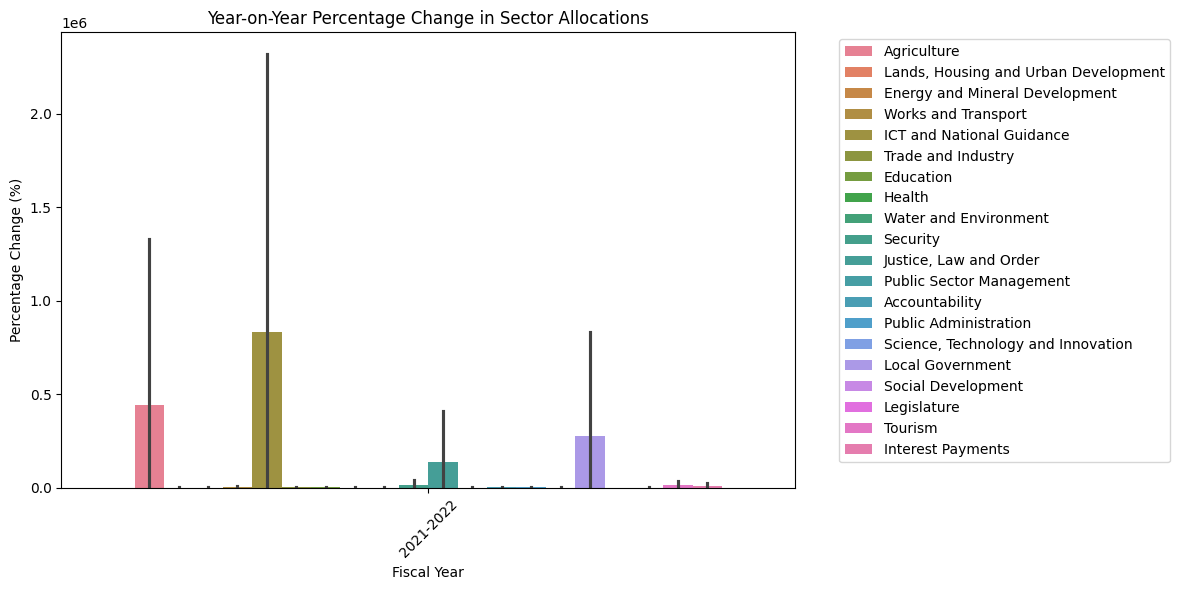

In [52]:
   # Bar chart: Year-on-year change
df['YoY_Change'] = df.groupby('SectorName')['Amount'].pct_change() * 100
plt.figure(figsize=(12, 6))
sns.barplot(data=df[df['Year'] != '2015-06-01'], x='Year', y='YoY_Change', hue='SectorName')
plt.title('Year-on-Year Percentage Change in Sector Allocations')
plt.xlabel('Fiscal Year')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/workspaces/uganda-budget-analysis/yoy_change.png')
plt.show()


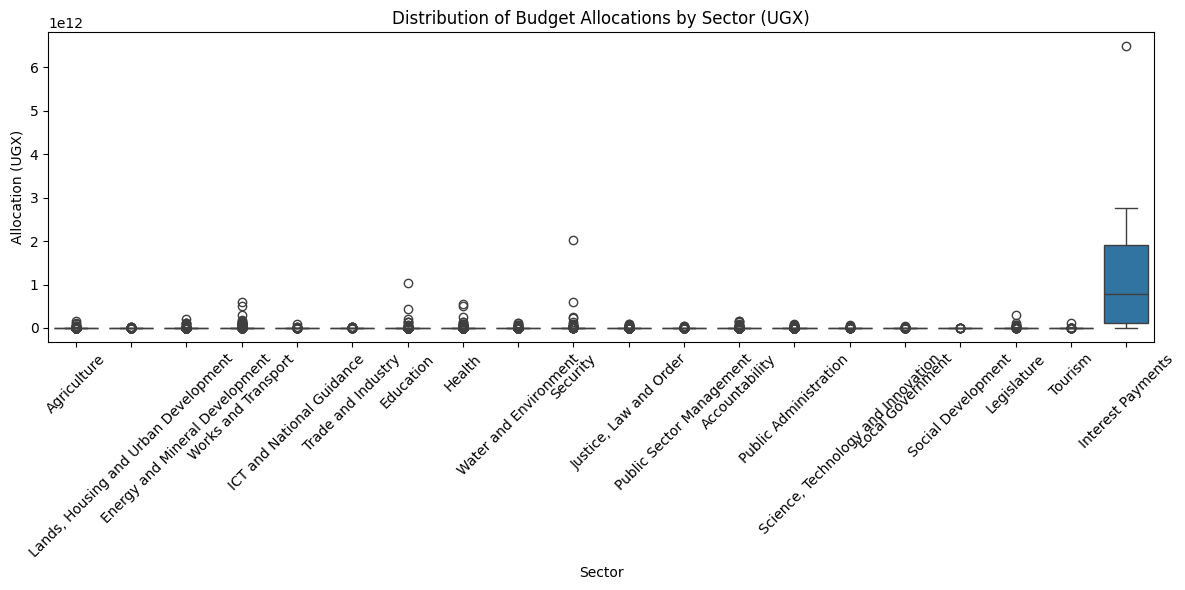

In [53]:
# Box plot: Allocation distribution\n",
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='SectorName', y='Amount')
plt.title('Distribution of Budget Allocations by Sector (UGX)')
plt.xlabel('Sector')
plt.ylabel('Allocation (UGX)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/workspaces/uganda-budget-analysis/sector_distribution.png')
plt.show()